In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from matplotlib import cm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1311,Freeletics: Personal Trainer & Fitness Workouts,HEALTH_AND_FITNESS,4.5,130104,25M,"10,000,000+",Free,0,Everyone,Health & Fitness,"August 3, 2018",5.3,5.0 and up
4766,Theme for Iphone X Plus,PERSONALIZATION,4.0,126,8.0M,"10,000+",Free,0,Everyone,Personalization,"October 19, 2017",1.0,2.3.3 and up
3564,aCalendar+ Calendar & Tasks,PRODUCTIVITY,4.6,26919,Varies with device,"100,000+",Paid,$5.99,Everyone,Productivity,"June 25, 2018",Varies with device,Varies with device
10201,Mini for fb lite,TOOLS,4.0,710,1.1M,"100,000+",Free,0,Everyone,Tools,"May 24, 2018",1.0,2.3 and up
5480,Glanceable Ap Watch Face,PERSONALIZATION,NaN,0,11M,5+,Paid,$0.99,Everyone,Personalization,"August 14, 2016",1.0.103,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#NULLS count table
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (total_null / df.shape[0]).sort_values(ascending=False)

null_df = pd.DataFrame({'total_null':total_null , 'percent_null':percent_null})
null_df

,total_null,percent_null
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


## Data Cleaning
### 1. Rating
**<hr>we see that Rating column has incorrect value. it must be 1-5 but its be in range 1-19.[](http://)**

In [8]:
print(f'Range of Rating column: {df.Rating.min()} - {df.Rating.max()}')

Range of Rating column: 1.0 - 19.0


Text(0.5, 1.0, 'Rating before filling NULLs')

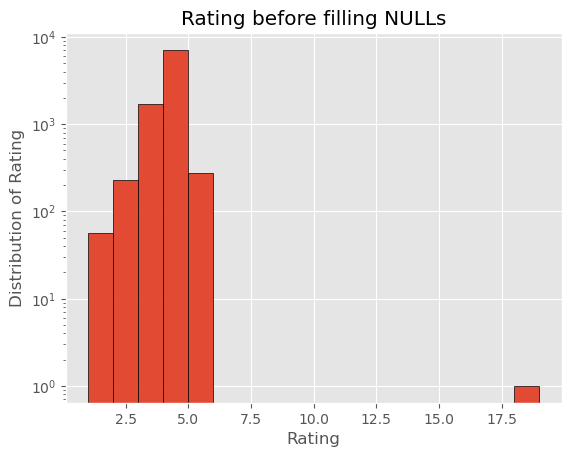

In [9]:
plt.hist(df.Rating , bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] , edgecolor='black' , log=True)
plt.xlabel("Rating")
plt.ylabel("Distribution of Rating")
plt.title("Rating before filling NULLs")

In [10]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**as you see there are 1 incorrect Rating value. the 10472th row is demaged. its rating and some other values are incorrect. I remove it from datas**

In [11]:
df = df.drop(10472)
print(f'Range of Rating column: {df.Rating.min()} - {df.Rating.max()}')

Range of Rating column: 1.0 - 5.0


**we found that rating has many NULLs. if drop these rows, we miss many informatinons.
<br>we can use fillna methods like "bfill" and "ffill"
<br>or use Imputation (or maybe An Extention to Imputation) methods with "mean", "median" or "most_frequent" strategy.
<br>I think a random strategy like "bfill" is better than another one beacause rating has no specific pattern.**

In [12]:
def fill_nulls(column):
    df[column] = df[column].fillna(method = 'bfill' , axis=0).fillna(method = 'ffill' , axis=0)

In [13]:
fill_nulls('Rating')
print(f' number of Null Rating: {df.Rating.isnull().sum()}')

 number of Null Rating: 0


Text(0.5, 1.0, 'Rating after filling NULLs')

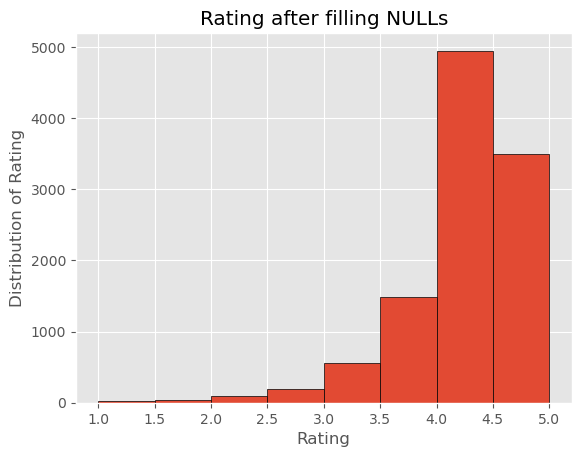

In [14]:
plt.hist(df.Rating , bins=[1,1.5,2,2.5,3,3.5,4,4.5,5] , edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Distribution of Rating")
plt.title("Rating after filling NULLs")

### 2. Reviews

**<hr>Reviews column must be integer but it is object.**

In [15]:
reviews_unique = df['Reviews'].unique()
reviews_unique

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

**With below code we can see all Reviews variable is numeric. then we convert it to integer.**

In [16]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].dtype

dtype('int64')

### 3. Size
**<hr>Size column must be float but it is object.**

In [18]:
size_unique = df['Size'].unique()
size_unique

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
df[df.Size == 'Varies with device'].shape

(1695, 13)

**The dataset has 1695 rows with a 'Varies with device' Size column. We will replace this value with 'nan' and also replace 'M' (Mega) with 'e+6' and 'k' (kilo) with 'e+3'. After that, we will convert the column to 'float64' data type.
<br>Next, we will convert 'nan' to 'after variable Size' or 'before variable Size' and will observe the distribution of 'after' fillna and 'before' fillna.**

In [20]:
df['Size'] = df['Size'].replace('Varies with device' , np.nan)
df['Size'] = df['Size'].str.replace('M' , 'e+6')
df['Size'] = df['Size'].str.replace('k' , 'e+3')
df['Size'] = df['Size'].apply(lambda x: float(x)/1000)
df['Size'].dtype

dtype('float64')

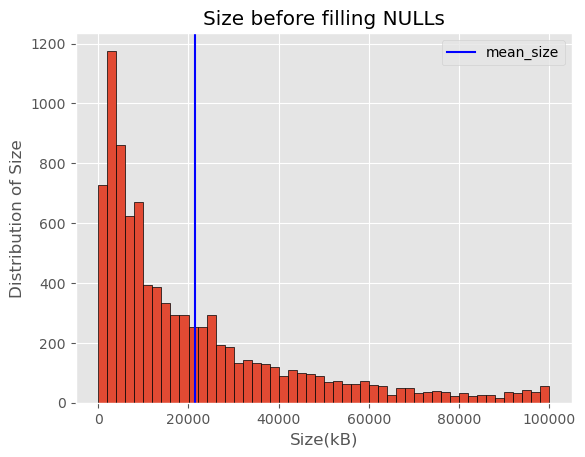

In [21]:
plt.hist(df.Size , edgecolor='black' , range=(df.Size.min(),df.Size.max()) , bins=(50))

plt.axvline(df.Size.mean() , label="mean_size" , color="blue")

plt.xlabel("Size(kB)")
plt.ylabel("Distribution of Size")
plt.title("Size before filling NULLs")
plt.legend()
plt.show()

In [22]:
fill_nulls('Size')
print(f' number of Null Size: {df.Size.isnull().sum()}')

 number of Null Size: 0


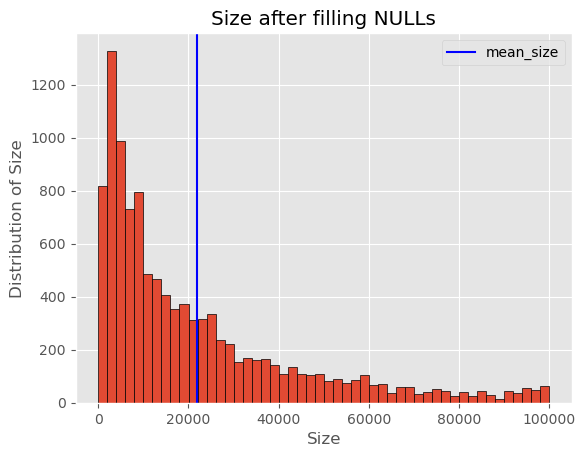

In [23]:
plt.hist(df.Size , edgecolor='black' , range=(df.Size.min(),df.Size.max()) , bins=(50))

plt.axvline(df.Size.mean() , label="mean_size" , color="blue")

plt.xlabel("Size")
plt.ylabel("Distribution of Size")
plt.title("Size after filling NULLs")
plt.legend()
plt.show()

**we see that distribution of Size after filling NULLs is similar to before it.**

### 4. Installs
**<hr>Installs column must be integer but it is object.**

In [24]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

**We will remove the '+' symbol and the ',' symbol from the Installs variable in ordeer to convert it to numeric format. after that we will check all this variable are numeric. Finally we will convert variable to "int" data type**

In [25]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df[~df.Installs.str.isnumeric()]

/tmp/ipykernel_20/1433558298.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
df['Installs'] = df['Installs'].astype(int)
df['Installs'].dtype

dtype('int64')

### 5. Price
**<hr>Price column must be float but it is object data type.**

In [27]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**We will remove the '$' symbol from the Price variable in order to convert it to numeric format. After that, we will check if all values in this variable are numeric. Finally, we will convert the variable to 'float' data type.**

In [28]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)
df['Price'].dtype

/tmp/ipykernel_20/3663365945.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


dtype('float64')

### 6. Last Updated
**Convert this variable to datetime because use day, month and year separately.**

In [29]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'] , format="%B %d, %Y")
df['Last Updated'].dtype

dtype('<M8[ns]')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


### 7. NULL values

In [31]:
#NULLS count table
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (total_null / df.shape[0]).sort_values(ascending=False)

null_df = pd.DataFrame({'total_null':total_null , 'percent_null':percent_null})
null_df

,total_null,percent_null
Current Ver,8,0.000738
Android Ver,2,0.000185
Type,1,0.000092
App,0,0.000000
Category,0,0.000000
Rating,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Price,0,0.000000


In [32]:
# use fill_nulls function
for column in null_df.index[ : 3]:
    fill_nulls(column)

### 8. Duplicate Rows
**<br>we must remove duplicate Rows that are same in "App", "Category" and "Type" values.**

In [33]:
#All row duplicated
row_duplicated = df.duplicated(subset=['App', 'Category', 'Type'], keep=False)
df[row_duplicated].sort_values(by=['App'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3800.0,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3800.0,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26000.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26000.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800.0,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,14000.0,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,7600.0,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,25000.0,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38000.0,10000000,Free,0.00,Everyone,Weather,2018-08-06,Varies with device,Varies with device


In [34]:
#Row duplicated without first rows
row_duplicated = df.duplicated(subset=['App', 'Category', 'Type'], keep='first')
df[row_duplicated].sort_values(by=['App'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3800.0,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26000.0,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800.0,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15000.0,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25000.0,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34000.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34000.0,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,14000.0,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,7600.0,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device


**This dataset has 1095 duplicated rows. We dropped it from dataset.**

In [35]:
print(f'df shape before dropping duplicated: {df.shape}\n')
df.drop_duplicates(subset=['App', 'Category', 'Type'] , keep='first' , inplace=True)
print(f'df shape after dropping duplicated: {df.shape}\n')

df shape before dropping duplicated: (10840, 13)

df shape after dropping duplicated: (9745, 13)



## Data Visualization

In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


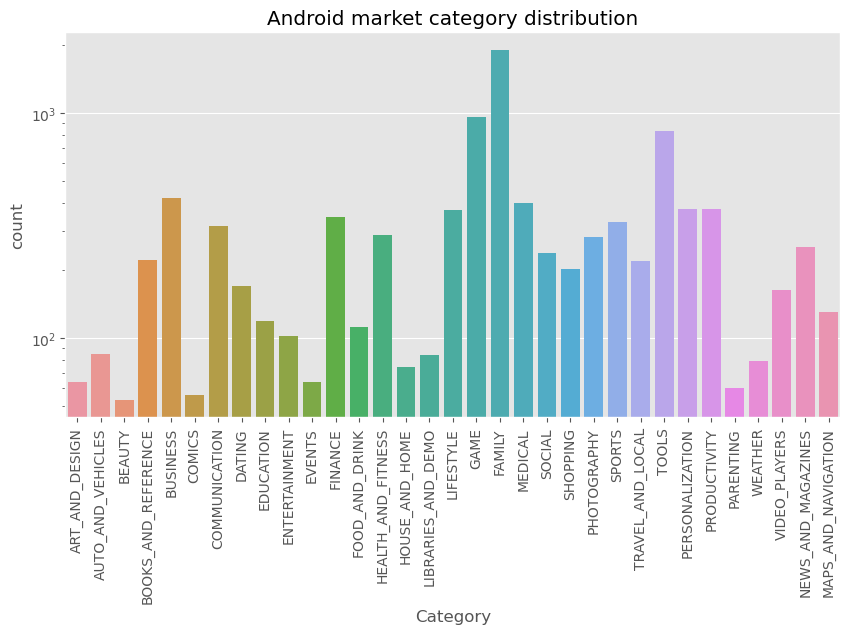

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.Category , log=True)
plt.xticks(rotation='vertical')
plt.title("Android market category distribution")
plt.show()

**find:** 
<br>The **Family** and **Game** categories have the highest apps.
<br>**Beauty**, **Comics** and **Parenting** categories have the lowest apps.

In [38]:
each_category = df['Category'].value_counts()
each_category = each_category.sort_values(ascending=False)
print("The number of applications in each category:")
each_category

The number of applications in each category:


FAMILY                 1909
GAME                    960
TOOLS                   829
BUSINESS                420
MEDICAL                 397
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

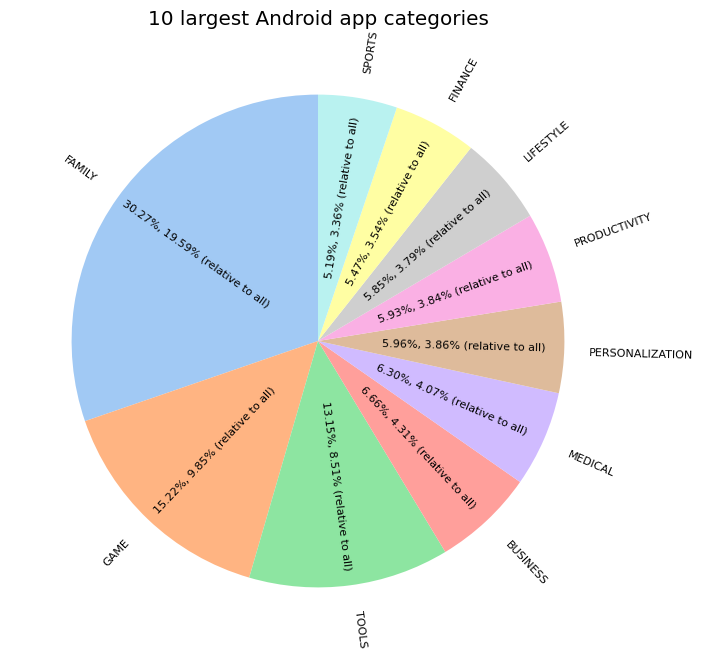

In [39]:
slices = each_category[:10]
labels = each_category.index[:10]
ratio_percent = each_category[:10].sum() / each_category.sum()

colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(8,8))
patches, labels, pct_texts = plt.pie(slices , labels=labels , autopct=lambda p: f'{p:1.2f}%, {p*ratio_percent :1.2f}% (relative to all) ', 
                                      textprops={'fontsize':8} , startangle=90, colors=colors, rotatelabels = True)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())

plt.title("10 largest Android app categories")
plt.show()

**find:**
**The percentage of 10 more categories between them and between all categories.**

In [40]:
df.sort_values(by=['Installs','Rating'] , ascending=False)[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,4000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,9700.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,17000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3234,Google,TOOLS,4.4,8033493,3900.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
3454,Google Drive,PRODUCTIVITY,4.4,2731171,4100.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,8800.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,8800.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,12000.0,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,7600.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device


**10 popular Apps based on rating and installs:**
* Subway Surfers
* Instagram
* Google Photos
* WhatsApp Messenger
* Google
* Google Drive
* Google Chrome: Fast & Secure
* Gmail
* Google Play Games
* Maps - Navigate & Explore

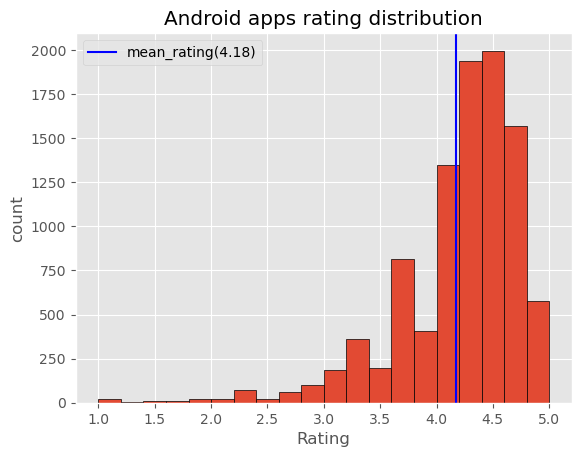

In [41]:
plt.hist(df.Rating , edgecolor='black' , bins=(20))

plt.axvline(df.Rating.mean() , label=f'mean_rating({df.Rating.mean():1.2f})' , color="blue")

plt.xlabel("Rating")
plt.ylabel("count")
plt.title("Android apps rating distribution")
plt.legend()
plt.show()

**find:**
**<br>Average of rating application is 4.18. we can devide app into "good" and "not good" through mean value. most of apps is higher than 4.18.**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Android apps category rating')

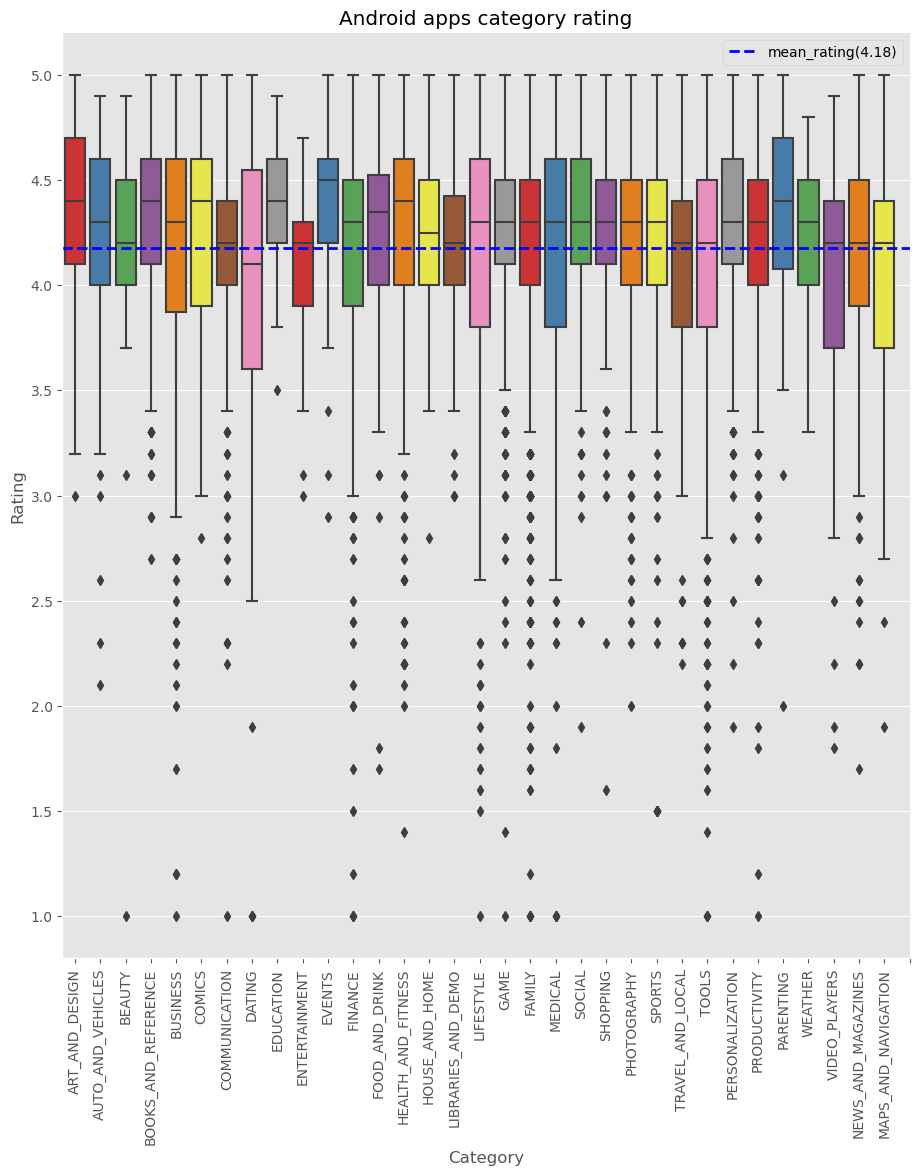

In [42]:
bplot = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,palette = "Set1")
bplot.set_xticklabels(rotation=90)
bplot.set( xticks=range(0,34))
bplot.set_ylabels("Rating")

plt.axhline(df.Rating.mean() , label=f'mean_rating({df.Rating.mean():1.2f})' , color="blue" , linewidth='2' , linestyle='--')

plt.legend()
plt.title('Android apps category rating')

**find:**
<br>Rating of category isnt very different from each other.
<br>75% of **Education** and **Events** rating is more than average rating.

<Figure size 1000x1000 with 0 Axes>

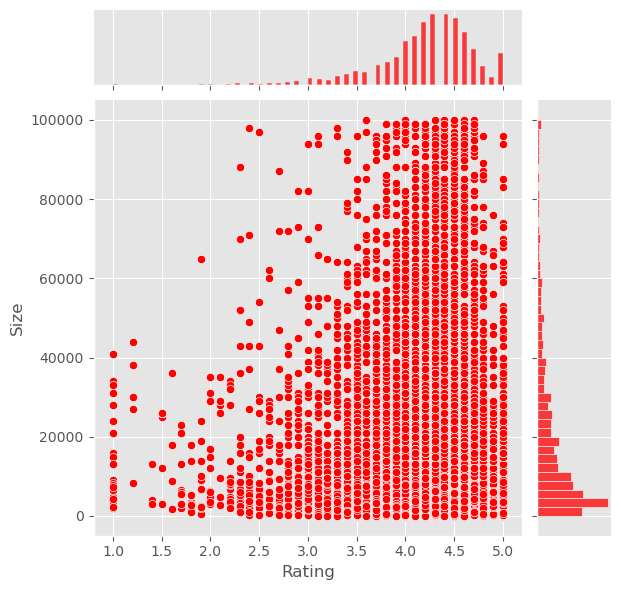

In [43]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df.Rating , y=df.Size , color = 'red')

**find:**
**<br>Most high rating apps size is : (0,40)MB**

<Figure size 1000x1000 with 0 Axes>

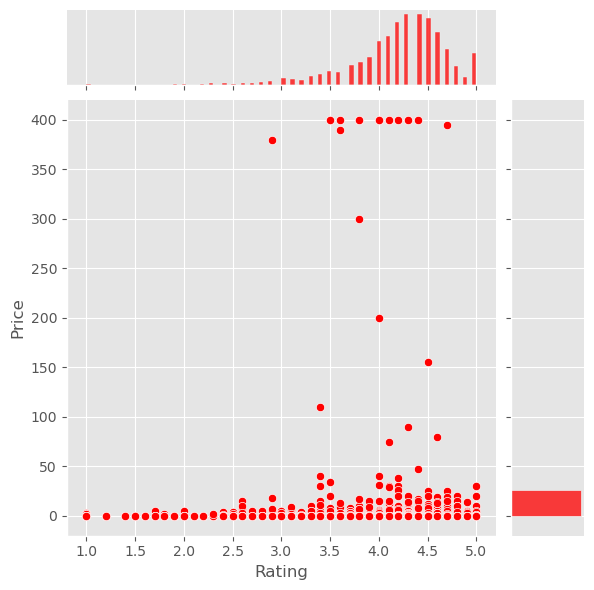

In [44]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df.Rating , y=df.Price , color = 'red')

***find:***
**<br>Most high rating apps price is : [0,30)$**

<Figure size 1000x1500 with 0 Axes>

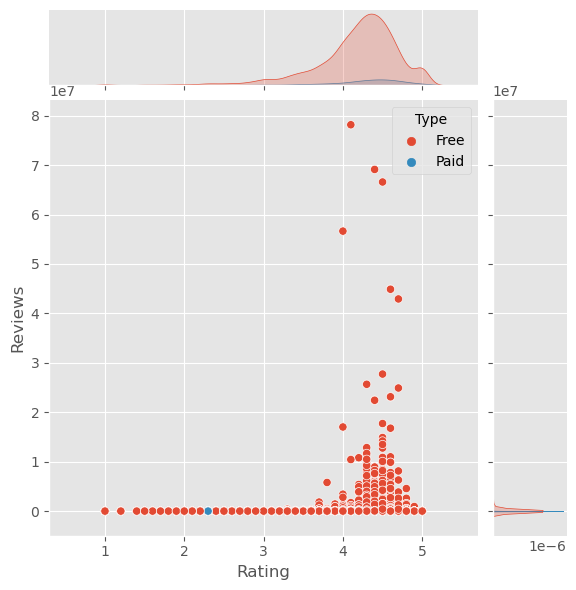

In [45]:
plt.figure(figsize = (10,15))
sn = sns.jointplot(x=df.Rating , y=df.Reviews , hue=df.Type , color = 'red' )
#sn.ax_joint.set_yscale('log')

**find:**
**<br>Apps with more reviews have higher rating.**
**<br>Free apps have more reviews than paid apps.**

<Figure size 1000x2000 with 0 Axes>

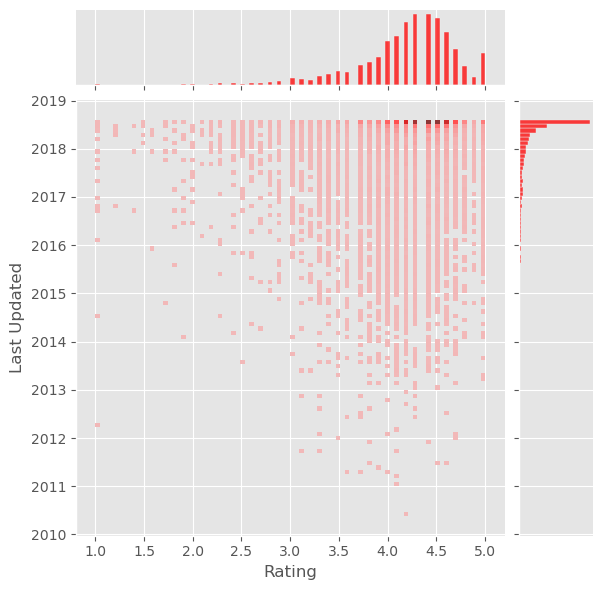

In [46]:
plt.figure(figsize = (10,20))
sn = sns.jointplot(x=df.Rating , y=df['Last Updated'] , kind='hist', color = 'red' )

**find:**
**<br>We found that apps with new last update have higher rating.**

<Figure size 1000x2000 with 0 Axes>

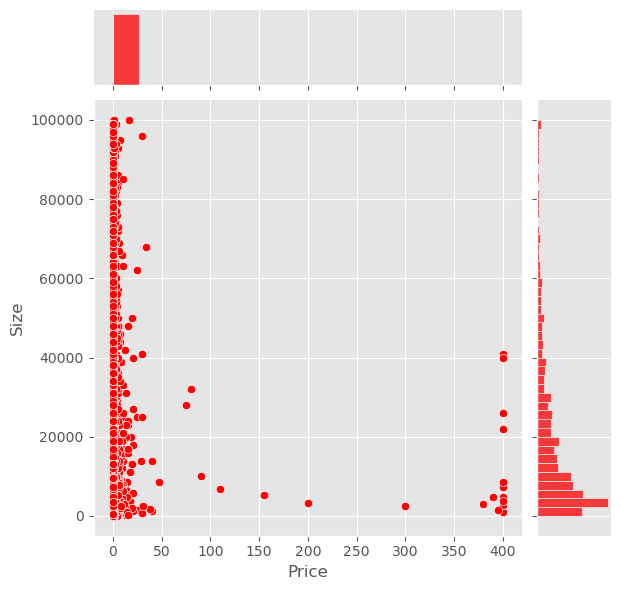

In [47]:
plt.figure(figsize = (10,20))
sn = sns.jointplot(x=df.Price , y=df.Size , color = 'red')

**find:**
**<br>People refer to pay for lower size apps.**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.01, 'Android app price for each category')

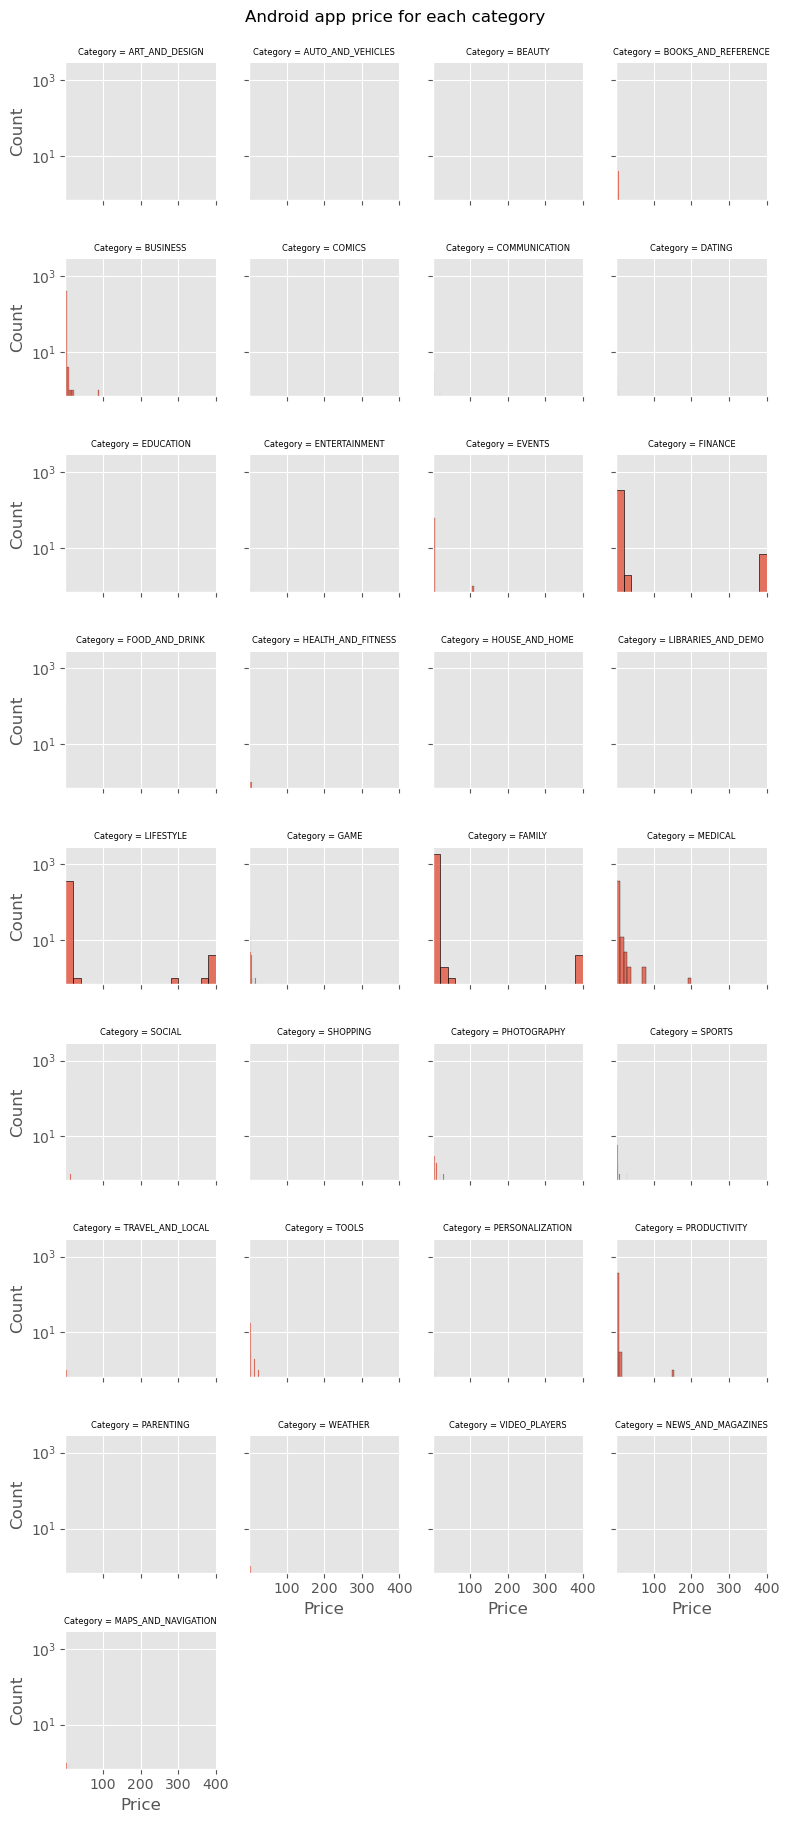

In [48]:

g = sns.FacetGrid(df, col="Category", col_wrap=4, height=2, xlim=(0, 400))
g.map_dataframe(sns.histplot, "Price" , bins=(20) , edgecolor='black' , log=True)
g.set(xticks=[100, 200, 300, 400])
g.set_titles(size=6)
g.fig.suptitle('Android app price for each category' , y=1.01 , fontdict={"weight": "bold"})

**find:**
<br>We have 3 types of categorical features:
1. Some categories like ART_AND_DESIGN, AUTO_AND_VEHICLE, BEAUTY, BOOKS_AND_REFERENCE, and more have **very few paid apps** with **low prices**, and most of them are free.
2. Some categories like BUSINESS, GAME, PHOTOGRAPHY, SPORTS, TOOLS, and PRODUCTIVITY have a **small number of paid apps** with **affordable prices**, and most of them are free.
3. Other categories like FINANCE, LIFESTYLE, FAMILY, and MEDICAL have **some paid apps** with **higher prices.**

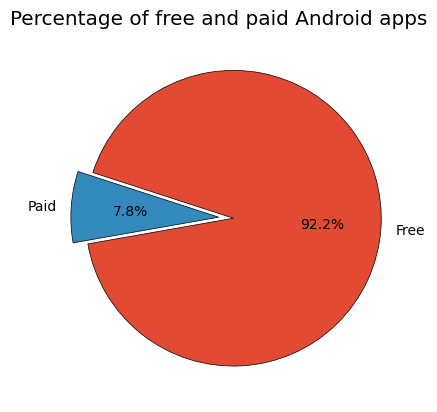

In [49]:
types_size = df.Type.value_counts(sort = True)
labels =types_size.index

explode = (0.1,0)

plt.pie(types_size, explode=explode, labels=labels, autopct='%1.1f%%', startangle=190 , wedgeprops={'edgecolor':'black'})

plt.title('Percentage of free and paid Android apps')
plt.show()

**find:**
**<br>92.2% of Android apps are free, while only 7.8% are paid.**

<Axes: >

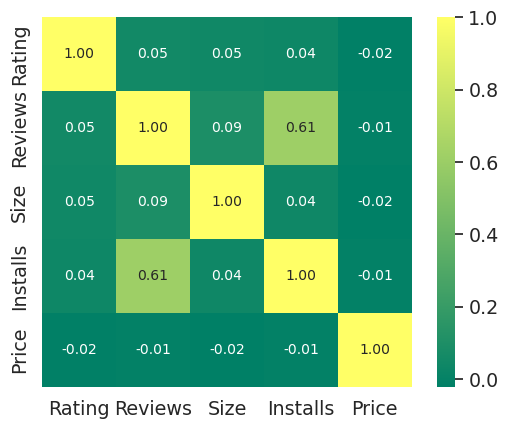

In [50]:
#correlation matrix only for numeric features
columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
cm = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns, xticklabels=columns, cmap='summer')


**find:**
<br>**Installs** and **Reviews** are more correlated, which means that apps with more reviews tend to have more installs.